# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
air_bnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# How many neighbourhood groups / which shows up the most
air_bnb['neighbourhood_group']
# The describe method will break it down
air_bnb['neighbourhood_group'].describe()


# HOW MANY NEIGHBOURHOOD GROUPS? 5
# WHICH SHOWS UP THE MOST? Manhattan

count         48895
unique            5
top       Manhattan
freq          21661
Name: neighbourhood_group, dtype: object

In [15]:
# Are private rooms the most popular in Manhattan?
# row beneth will show the neighborhood only in manhattan
#air_bnb[air_bnb['neighbourhood_group'] =='Manhattan']
#air_bnb[air_bnb['neighbourhood_group']== 'room_type'].describe()
# add new column to the end to access the information 
#air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']['room_type']
air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']['room_type'].describe()


# Entire homes/ Apartments are the most popular 


count               21661
unique                  3
top       Entire home/apt
freq                13199
Name: room_type, dtype: object

In [29]:
# Who are the top 10 busiest hosts based on number of reviews per month?
#air_bnb['host_id'].head(10)
top_hosts = air_bnb.groupby(['host_name', 'host_id']).sum()
#top_hosts.sort_values('reviews_per_month',ascending = True).tail(10)
top_hosts.sort_values('reviews_per_month').tail(10)

# Sonder, Row NYC, Lakshmee, Danielle,David,Gabriel, Asad, Brooklyn and Breakfast, Nalicia,Maya


,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_name,host_id,,,,,,,,,
Maya,37312959,51232186,203.85153,-369.38202,213,5,2273,53.53,25,824
Nalicia,156684502,66477294,121.98566,-221.30880,180,3,1046,54.38,9,77
Brooklyn& Breakfast -Len-,344035,155403744,528.82140,-961.61568,970,13,2205,56.00,169,3723
Asad,156948703,135792224,244.61926,-443.23651,588,6,1052,56.44,36,2038
Gabriel,224414117,921229890,1222.67553,-2219.92301,6394,30,403,59.10,900,8679
David,137274917,345517389,489.12293,-887.88925,1320,12,607,62.89,144,2827
Danielle,26432133,74542317,203.81845,-369.35591,236,5,2017,68.02,25,1443
Lakshmee,232251881,254974885,325.33942,-590.27250,403,8,482,80.63,64,1369
Row NYC,244361589,294108503,366.82627,-665.89623,1845,9,305,111.72,81,2633


Text(0, 0.5, 'Average Price')

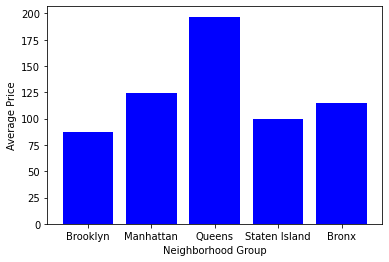

In [30]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
price = air_bnb.groupby('neighbourhood_group')


the_bronx = price.get_group('Bronx')['price'].mean()
brooklyn = price.get_group('Brooklyn')['price'].mean()
manhattan = price.get_group('Manhattan')['price'].mean()
queens = price.get_group('Queens')['price'].mean()
staten_is = price.get_group('Staten Island')['price'].mean()


plt.bar(
    air_bnb['neighbourhood_group'].unique(),
    [the_bronx,brooklyn, manhattan, queens, staten_is],
    color='b')
plt.xlabel('Neighborhood Group', color='black')
plt.ylabel('Average Price', color='black')



In [47]:
# What is the most expensive neighbourhood in each neighbourhood_group
expensive = air_bnb.groupby(['neighbourhood_group', 'neighbourhood'])['price'].describe()
expensive.sort_values(['neighbourhood','mean'], ascending=False)


count        mean         std    min  \
neighbourhood_group neighbourhood                                           
Queens              Woodside         235.0   85.097872   70.724116   28.0   
Staten Island       Woodrow            1.0  700.000000         NaN  700.0   
Bronx               Woodlawn          11.0   60.090909   19.821476   29.0   
Queens              Woodhaven         88.0   67.170455   40.527335   10.0   
Brooklyn            Windsor Terrace  157.0  138.993631   84.630532   38.0   
...                                    ...         ...         ...    ...   
Queens              Astoria          900.0  117.187778  349.898287   25.0   
                    Arverne           77.0  171.779221  193.347902   35.0   
Staten Island       Arrochar          21.0  115.000000  133.119120   32.0   
                    Arden Heights      4.0   67.250000   18.300729   41.0   
Bronx               Allerton          42.0   87.595238   73.048617   33.0   

                                        25%    50%     75%      max  
neighbourhood_group neighbourhood                                    
Queens              Woodside          44.50   60.0  100.00    500.0  
Staten Island       Woodrow          700.00  700.0  700.00    700.0  
Bronx               Woodlawn          42.50   68.0   73.50     85.0  
Queens              Woodhaven         45.00   52.0   70.25    250.0  
Brooklyn            Windsor Terrace   77.00  123.0  160.00    450.0  
...                                     ...    ...     ...      ...  
Queens              Astoria           60.00   85.0  120.00  10000.0  
                    Arverne           75.00  125.0  200.00   1500.0  
Staten Island       Arrochar          34.00   65.0  125.00    625.0  
                    Arden Heights     62.75   72.5   77.00     83.0  
Bronx               Allerton          47.00   66.5  104.75    450.0  

[221 rows x 8 columns]

In [53]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
air_bnb['min_rental'] = air_bnb['price']*air_bnb['minimum_nights']
air_bnb[['host_id','host_name', 'min_rental']].sort_values('min_rental').tail()

#jenny has the hisghest price 




,host_id,host_name,min_rental
44429,9295237,Noelle,730000
17811,41870118,Iveta,857750
12342,3906464,Amy,989901
9151,20582832,Kathrine,1000000
48043,271248669,Jenny,1170000


In [58]:
# Who has no (zero) availability with a review count of 100 or more
host_reviews= air_bnb[air_bnb['number_of_reviews'] >=100]
host_reviews[host_reviews['availability_365'] == 0][['host_name', 'number_of_reviews', 'availability_365']]



,host_name,number_of_reviews,availability_365
8,MaryEllen,118,0
94,Christiana,168,0
132,Sol,193,0
174,Coral,114,0
180,Doug,206,0
...,...,...,...
29581,Kathleen,103,0
30461,Janet,119,0
31250,Albert,102,0
32670,Stephany,131,0


In [61]:
# If each host rents all of their properties for the night, which 5 make the most that night?
rent_1 = air_bnb.groupby(['host_name']).sum()
rent_1.sort_values('price').tail()






,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,min_rental
host_name,,,,,,,,,,,
Alex,5496620312,19850092761,11361.10533,-20635.86235,52563,1651,6204,443.44,475,30031,373786
David,7943862898,28633613354,16414.34392,-29804.53757,65844,3754,8103,508.61,907,44171,592094
Michael,7430617239,22673153604,16984.89137,-30841.28573,66895,4600,11081,475.82,1043,38888,610539
Blueground,7210036953,24924786136,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884,2258580
Sonder (NYC),10885561678,71782340547,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588,950453


In [91]:
# When did Danielle from Queens last receive a review?
# air_bnb[air_bnb['host_name'] == 'Danielle'][['host_name', 'last_review']].sort_values('last_review')

air_bnb[(air_bnb['host_name']=='Danielle')& (air_bnb['neighbourhood_group']=='Queens')].sort_values('last_review')

TypeError: list indices must be integers or slices, not str

In [88]:
# bar chart showing the number of room types in the Bronx




AttributeError: 'list' object has no attribute 'groupby'

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --